# Data preparation

In [1]:
# Libraries

## Basic libraries
import numpy as np
import pandas as pd
import seaborn as sns

## Plotting
import matplotlib.pyplot as plt

# Basic cleaning
## Variance
from sklearn.feature_selection import VarianceThreshold


## Data cleaning

### Basic data cleaning

In [2]:
# Load datasets

# Load Oil spill data
path_oil_spill = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv"
oil_spill_data=pd.read_csv(path_oil_spill,header=None)
display(f"Shape of oil_spill_data : {oil_spill_data.shape}")

# Load Iris Flower dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target
display(f"Shape of iris_data : {iris_data.shape}")

'Shape of oil_spill_data : (937, 50)'

'Shape of iris_data : (150, 5)'

In [3]:
# Copy of datasets
oil_spill_data_copy = oil_spill_data.copy()
iris_data_copy = iris_data.copy()

#### Identify Columns That Contain a Single Value

In [4]:
# Summurize the number of unique values in each column
oil_spill_data.nunique();

#### Delete Columns That Contain a Single Value

In [5]:
# Create a function to drop columns that have a single value
def drop_single_value_columns(df : pd.DataFrame) -> pd.DataFrame:
        """
    Drop columns with a single unique value 
    Args:
        df (DataFrame): Raw data
    Returns:
        df (DataFrame) with no single value columns
    """ 
        print(f"Shape BEFORE dropping single value columns: {df.shape}") 
        
        # get number of unique values for each column 
        counts = df.nunique()
        
        # record columns to delete (i.e columns that only contain a unique value)
        to_del = [i for i,v in enumerate(counts) if v == 1]
    
        print(f"Names of single value columns: {to_del}") 
        
        # drop useless columns 
        df.drop(to_del, axis=1, inplace=True) 
        
        print(f"Shape AFTER dropping single value columns: {df.shape}") 
        return df

In [6]:
oil_spill_data = drop_single_value_columns(oil_spill_data)

Shape BEFORE dropping single value columns: (937, 50)
Names of single value columns: [22]
Shape AFTER dropping single value columns: (937, 49)


#### Consider Columns That Have Very Few Values

This does not mean that these rows and columns should be deleted, but they require further attention. <br>
For example: <br>
•	Perhaps the unique values can be encoded as ordinal values? <br>
•	Perhaps the unique values can be encoded as categorical values? <br>
•	Perhaps compare model skill with each variable removed from the dataset?


In [7]:
# Retrieve original data
oil_spill_data = oil_spill_data_copy

In [8]:
# Create a function that print index, number of unique values and percentage of unique values per column in regard to total number of rows per column
def show_unique_values_percentage(df : pd.DataFrame):
    """
    Print index, number of unique values and percentage of unique values per column in regard to total number of rows per column
    Args:
        - df (DataFrame): Raw data
    """  
    for i in range(df.shape[1]):
        num = df.nunique().values[i]
        percentage = float(num) / df.shape[0] * 100
        print(f"{i}, {num}, {round(percentage,1)}%")

In [9]:
show_unique_values_percentage(oil_spill_data)

0, 238, 25.4%
1, 297, 31.7%
2, 927, 98.9%
3, 933, 99.6%
4, 179, 19.1%
5, 375, 40.0%
6, 820, 87.5%
7, 618, 66.0%
8, 561, 59.9%
9, 57, 6.1%
10, 577, 61.6%
11, 59, 6.3%
12, 73, 7.8%
13, 107, 11.4%
14, 53, 5.7%
15, 91, 9.7%
16, 893, 95.3%
17, 810, 86.4%
18, 170, 18.1%
19, 53, 5.7%
20, 68, 7.3%
21, 9, 1.0%
22, 1, 0.1%
23, 92, 9.8%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
27, 308, 32.9%
28, 447, 47.7%
29, 392, 41.8%
30, 107, 11.4%
31, 42, 4.5%
32, 4, 0.4%
33, 45, 4.8%
34, 141, 15.0%
35, 110, 11.7%
36, 3, 0.3%
37, 758, 80.9%
38, 9, 1.0%
39, 9, 1.0%
40, 388, 41.4%
41, 220, 23.5%
42, 644, 68.7%
43, 649, 69.3%
44, 499, 53.3%
45, 2, 0.2%
46, 937, 100.0%
47, 169, 18.0%
48, 286, 30.5%
49, 2, 0.2%


In [10]:
# Create a function that print index, number of unique values and percentage of unique values per column in regard to total number of rows per column
def show_unique_values_percentage_below_threshold(df : pd.DataFrame,threshold : float):
    """
    Print index, number of unique values (below a threshold) and percentage of unique values per column in regard to total number of rows per column
    Args:
        - df (DataFrame): Raw data
        - threshold (float) : percentage (%)
    """  
    for i in range(df.shape[1]):
        num = df.nunique().values[i]
        percentage = float(num) / df.shape[0] * 100
        if percentage < threshold:
            print(f"{i}, {num}, {round(percentage,1)}%")

In [11]:
show_unique_values_percentage_below_threshold(oil_spill_data, 1.0)

21, 9, 1.0%
22, 1, 0.1%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
32, 4, 0.4%
36, 3, 0.3%
38, 9, 1.0%
39, 9, 1.0%
45, 2, 0.2%
49, 2, 0.2%


In [12]:
# Create a function to get columns where number of unique values is less than X% of the rows of the entire considered dataset
def get_columns_with_few_values_under_threshold(df : pd.DataFrame, threshold : float) -> list:
    """
    Get columns where number of unique values is less than X% of the rows of the entire considered dataset
    Args:
        - df (DataFrame): Raw data
        - threshold (float) : percentage (%)
    Returns:
        df (DataFrame) with no columns whose number of unique values are below threshold (in regard to total number of rows of considered dataset)
    """    
    # get number of unique values for each column 
    counts = df.nunique() 
    
    # record columns to delete 
    cols_with_few_values = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < threshold]

    return cols_with_few_values

In [13]:
get_columns_with_few_values_under_threshold(oil_spill_data, 1.0)

[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]

In [14]:
# Create a function to drop columns where number of unique values is less than X% of the rows of the entire considered dataset
def drop_columns_with_few_values_under_threshold(df : pd.DataFrame, threshold : float) -> pd.DataFrame:
    """
    Drop columns where number of unique values is less than X% of the rows of the entire considered dataset
    Args:
        - df (DataFrame): Raw data
        - threshold (float) : percentage (%)
    Returns:
        df (DataFrame) with no columns whose number of unique values are below threshold (in regard to total number of rows of considered dataset)
    """ 
    print(f"Shape BEFORE dropping few value columns: {df.shape}")
    
    # get number of unique values for each column 
    counts = df.nunique() 
    
    # record columns to delete 
    to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < threshold]

    print(f"Names of columns with few values: {to_del}") 
    
    # drop useless columns 
    df.drop(to_del, axis=1, inplace=True) 
    
    print(f"Shape AFTER dropping columns with few values: {df.shape}") 
    return df

In [15]:
oil_spill_data = drop_columns_with_few_values_under_threshold(oil_spill_data, 1.0)

Shape BEFORE dropping few value columns: (937, 50)
Names of columns with few values: [21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
Shape AFTER dropping columns with few values: (937, 39)


#### Remove columns that have a low variance

In [16]:
# explore the effect of the variance thresholds on the number of selected features from numpy import arange 
def explore_variance_threshold_effects(df : pd.DataFrame, range : np.arange):
    """
    Explore the effect of the variance thresholds on the number of selected features from numpy import arange 
    Args:
        - df (DataFrame): Raw data
        - range (np.arange) : variance range to check
    Returns:
        - Print number of features whose variance is over the considered threshold
        - Plot the number of features whose variance is over the considered threshold
    """ 
    
    # apply transform with each threshold 
    results = list() 

    for t in range: 
        # define the transform 
        transform = VarianceThreshold(threshold=t) 
        
        # transform the input data 
        df_sel = transform.fit_transform(df) 
        
        # determine the number of input features 
        n_features = df_sel.shape[1] 
        
        print(f">Threshold={round(t,2)}, Features={n_features}")
        
        # store the result 
        results.append(n_features) 
        
    # plot the threshold vs the number of selected features 
    plt.plot(range, results) 
    plt.show()

(937, 38) (937,)
>Threshold=0.0, Features=38
>Threshold=0.05, Features=29
>Threshold=0.1, Features=28
>Threshold=0.15, Features=28
>Threshold=0.2, Features=28
>Threshold=0.25, Features=28
>Threshold=0.3, Features=28
>Threshold=0.35, Features=28
>Threshold=0.4, Features=28
>Threshold=0.45, Features=26
>Threshold=0.5, Features=25


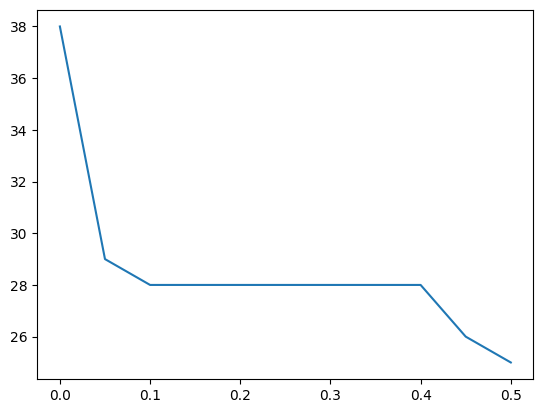

In [17]:
# Retrieve original data
oil_spill_data = oil_spill_data_copy

# split data into inputs and outputs 
data = oil_spill_data.values 
X = data[:, :-1] 
y = data[:, -1] 
print(X.shape, y.shape) 

# define variance thresholds to check 
thresholds = np.arange(0.0, 0.55, 0.05) 

explore_variance_threshold_effects(X, thresholds)

In [18]:
# Remove features whose variance is lower than threshold
threshold = 0.4

# Retrieve original data
oil_spill_data = oil_spill_data_copy

# split data into inputs and outputs 
data = oil_spill_data.values 
X = data[:, :-1] 
y = data[:, -1] 
print(X.shape) 

# define the transform 
transform = VarianceThreshold(threshold=threshold) 

# transform the input data 
X_sel = transform.fit_transform(X) 

print(X_sel.shape) 

(937, 38)
(937, 28)


#### Identify rows that contain duplicate data

In [19]:
# Retrieve original data
iris_data = iris_data_copy

In [20]:
# calculate duplicates 
dups = iris_data.duplicated() 

# report if there are any duplicates 
print(dups.any()) 

# list all duplicate rows 
print(iris_data[dups])

True
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
142                5.8               2.7                5.1               1.9   

     target  
142       2  


#### Delete rows thtat contain duplicate data

In [21]:
def check_duplicates(df):
    """
    Counts duplicated rows. If any, function drops duplicated rows.
    Args:
        df (DataFrame): Raw data
    Returns:
        - df (Dataframe) without duplicated rows, a string otherwise.
    """

    # Check number of rows before removing duplicates
    print(f"Number of rows : {len(df)}")

    # Compute the number of duplicated rows
    num_dups = df.duplicated().sum()
    
    print(f"Number of duplicated rows : {num_dups}")

    if df.duplicated().any():
        # Remove duplicates
        df_no_duplicates = df.drop_duplicates()
        print(f"{num_dups} duplicated row(s) removed")
        return df_no_duplicates
    else:
        return "No duplicated rows found !"    

In [22]:
iris_data_no_dups = check_duplicates(iris_data)

Number of rows : 150
Number of duplicated rows : 1
1 duplicated row(s) removed


### Outlier Identification and Removal

In [23]:
# generate gaussian data 
from numpy.random import seed 
from numpy.random import randn 
from numpy import mean 
from numpy import std 
# seed the random number generator 
seed(1) 
# generate univariate observations 
data = 5 * randn(10000) + 50 
# summarize 
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))


mean=50.049 stdv=4.994


<Axes: >

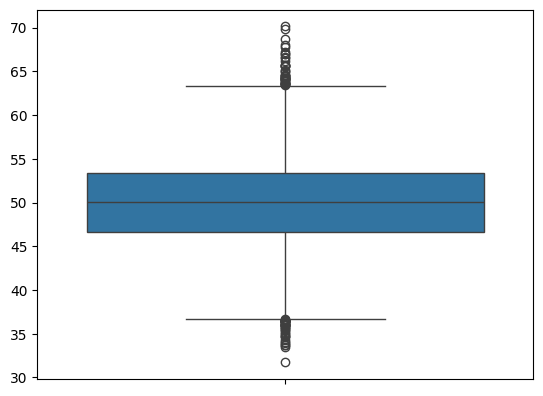

In [24]:
# Plot boxplot of data
fig, ax = plt.subplots()
sns.boxplot(data=data, ax=ax)

#### Standard Deviation Method 

If we know that the distribution of values in the sample is Gaussian or Gaussian-like, we can use the standard deviation of the sample as a cut-off for identifying outliers. 

In [25]:
# If distribution Gaussian or Gaussian-like, we use the standard deviation of the sample as a cut-off for identifying outliers
def identify_outliers_std_dev_method(data : np.ndarray):
    """
    If distribution Gaussian or Gaussian-like, we use the standard deviation of the sample as a cut-off for identifying outliers
    Args:
        data (ndarray): Raw data
    Returns:
        - outliers (ndarray) : only identified outliers
        - outliers_removed (ndarray) : data with outliers removed
    """

    # calculate summary statistics 
    data_mean, data_std = mean(data), std(data) 

    # define outliers 
    cut_off = data_std * 3 
    lower, upper = data_mean - cut_off, data_mean + cut_off 

    # identify outliers 
    outliers = [x for x in data if x < lower or x > upper] 
    print(f"Identified outliers: {len(outliers)}") 

    # remove outliers
    outliers_removed = [x for x in data if x >= lower and x <= upper] 
    print(f"Non-outlier observations: {len(outliers_removed)}")

    return outliers, outliers_removed

So far we have only talked about univariate data with a Gaussian distribution, e.g. a single variable. You can use the same approach if you have multivariate data, e.g. data with multiple variables, each with a different Gaussian distribution. You can imagine bounds in two dimensions that would define an ellipse if you have two variables. Observations that fall outside of the ellipse would be considered outliers. In three dimensions, this would be an ellipsoid, and so on into higher dimensions. Alternately, if you knew more about the domain, perhaps an outlier may be identified by exceeding the limits on one or a subset of the data dimensions.

In [26]:
# identify outliers with standard deviation 
from numpy.random import seed 
from numpy.random import randn 
from numpy import mean 
from numpy import std 

# seed the random number generator 
seed(1) 

# generate univariate observations 
data = 5 * randn(10000) + 50 

outliers, outliers_removed = identify_outliers_std_dev_method(data)

Identified outliers: 29
Non-outlier observations: 9971


#### Interquartile Range Method 

In [27]:
# identify outliers with interquartile range 
def identify_outliers_iqr_method(data : np.ndarray):
    """
    A good statistic for summarizing a non-Gaussian distribution sample of data is the Interquartile Range, or IQR for short.
    This function identifies outliers with interquartile range (iqr).
    Args:
        data (ndarray): Raw data
    Returns:
        - outliers (ndarray) : only identified outliers
        - outliers_removed (ndarray) : data with outliers removed
    """
    
    # calculate interquartile range 
    q25, q75 = percentile(data, 25), percentile(data, 75) 
    iqr = q75 - q25 
    print(f"Percentiles: 25th={round(q25,3)}, 75th={round(q75,3)}, IQR={round(iqr,3)}") 
    
    # calculate the outlier cutoff 
    cut_off = iqr * 1.5 
    lower, upper = q25 - cut_off, q75 + cut_off 
    
    # identify outliers 
    outliers = [x for x in data if x < lower or x > upper] 
    print('Identified outliers: %d' % len(outliers)) 
    
    # remove outliers 
    outliers_removed = [x for x in data if x >= lower and x <= upper] 
    print('Non-outlier observations: %d' % len(outliers_removed))
    
    return outliers, outliers_removed

In [28]:
# identify outliers with interquartile range 
from numpy.random import seed 
from numpy.random import randn 
from numpy import percentile 
# seed the random number generator 
seed(1) 
# generate univariate observations 
data = 5 * randn(10000) + 50 

outliers, outliers_removed = identify_outliers_iqr_method(data)

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Identified outliers: 81
Non-outlier observations: 9919


#### Automatic Outlier Detection 

In [29]:
# Load Boston Housing Dataset 
boston_housing = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv "
boston_housing=pd.read_csv(boston_housing,header=None)
display(f"Shape of boston_housing : {boston_housing.shape}")

'Shape of boston_housing : (506, 14)'

In [30]:
# evaluate model on the raw dataset 
from pandas import read_csv 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error 

# retrieve the array 
data = boston_housing.values 

# split into input and output elements 
X, y = data[:, :-1], data[:, -1] 

# split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# fit the model 
model = LinearRegression() 
model.fit(X_train, y_train) 

# evaluate the model
yhat = model.predict(X_test) 

# evaluate predictions 
mae = mean_absolute_error(y_test, yhat) 
print(f"MAE: {round(mae,3)}")

MAE: 3.417


##### LocalOutlierFactor

In [31]:
# evaluate model on training dataset with outliers removed 
from pandas import read_csv 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.metrics import mean_absolute_error 

# retrieve the array 
data = boston_housing.values 

# split into input and output elements
X, y = data[:, :-1], data[:, -1] 

# split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# summarize the shape of the training dataset 
print(X_train.shape, y_train.shape) 

# identify outliers in the training dataset 
lof = LocalOutlierFactor() 
yhat = lof.fit_predict(X_train) 

# select all rows that are not outliers 
mask = yhat != -1 
X_train, y_train = X_train[mask, :], y_train[mask] 

# summarize the shape of the updated training dataset 
print(X_train.shape, y_train.shape) 

# fit the model 
model = LinearRegression() 
model.fit(X_train, y_train) 

# evaluate the model 
yhat = model.predict(X_test) 

# evaluate predictions 
mae = mean_absolute_error(y_test, yhat) 
print(f"MAE: {round(mae,3)}")

(339, 13) (339,)
(305, 13) (305,)
MAE: 3.356


##### IsolationForest 

In [32]:
# evaluate model on training dataset with outliers removed 
from pandas import read_csv 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error 

# retrieve the array 
data = boston_housing.values 

# split into input and output elements
X, y = data[:, :-1], data[:, -1] 

# split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# summarize the shape of the training dataset 
print(X_train.shape, y_train.shape) 

# identify outliers in the training dataset 
lof = IsolationForest() 
yhat = lof.fit_predict(X_train) 

# select all rows that are not outliers 
mask = yhat != -1 
X_train, y_train = X_train[mask, :], y_train[mask] 

# summarize the shape of the updated training dataset 
print(X_train.shape, y_train.shape) 

# fit the model 
model = LinearRegression() 
model.fit(X_train, y_train) 

# evaluate the model 
yhat = model.predict(X_test) 

# evaluate predictions 
mae = mean_absolute_error(y_test, yhat) 
print(f"MAE: {round(mae,3)}")

(339, 13) (339,)
(294, 13) (294,)
MAE: 3.218
